# Titanic Survival - Classification Prediction

- Univariate Analysis
    * 12 Variables
    * Age & Embarked containes missing values
    * There are 3 classes and the largest number of people are in Class 3, 1 and then 2. 
    * The survival rate is high in females.
    * Highest number of people belongs to the age between 15 - 30 years
    

- Bi-Variate Analysis
    * The highest survival rate is from Class 1 & the highest death rate is from Class 3.
    * The maximum amount of people had a family size onboard of 0-2 members.
    * We can see outliers towards the higher end in the var "Fare".


- Feature Engineering
    * Created a dummy/numeric variable for "Sex". (Instead of M/F converted to 1/0)
    
    * Created a new variable "Family Size" by combining 2 variables "SibSp & Parch".
    
    * Created a dummy/numeric variable for "Embarked". (Instead of S/C/Q converted to 1/2/3) 
    
    * Imputed missing values for "Embarked" with Mode & for "Age" with Median.


- Model Buildin
    * I have built 4 different classification models, Logistic Regression, NB, DT, RF.
    * The Accuracy of all the models initially was between 0.79 - 0.82.
    * Chose the Random Forest as a final model as it gave the best of the results. 
    * Fine tuned the parameters, removed less important features and then built another model. 
    * Accuracy improved by 1%.
    * Built another set of model after scaling the features for normalizing them which bought an improvement of 2% in RF & LR.
    

- Final Model    
    * Built a final model on RF with an accuracy of 84%.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,classification_report,roc_auc_score,roc_curve,
                             average_precision_score,precision_recall_curve, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import math

In [5]:
df = pd.read_csv("titanic_train.csv")

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Univariate Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\zaina\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\zaina\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


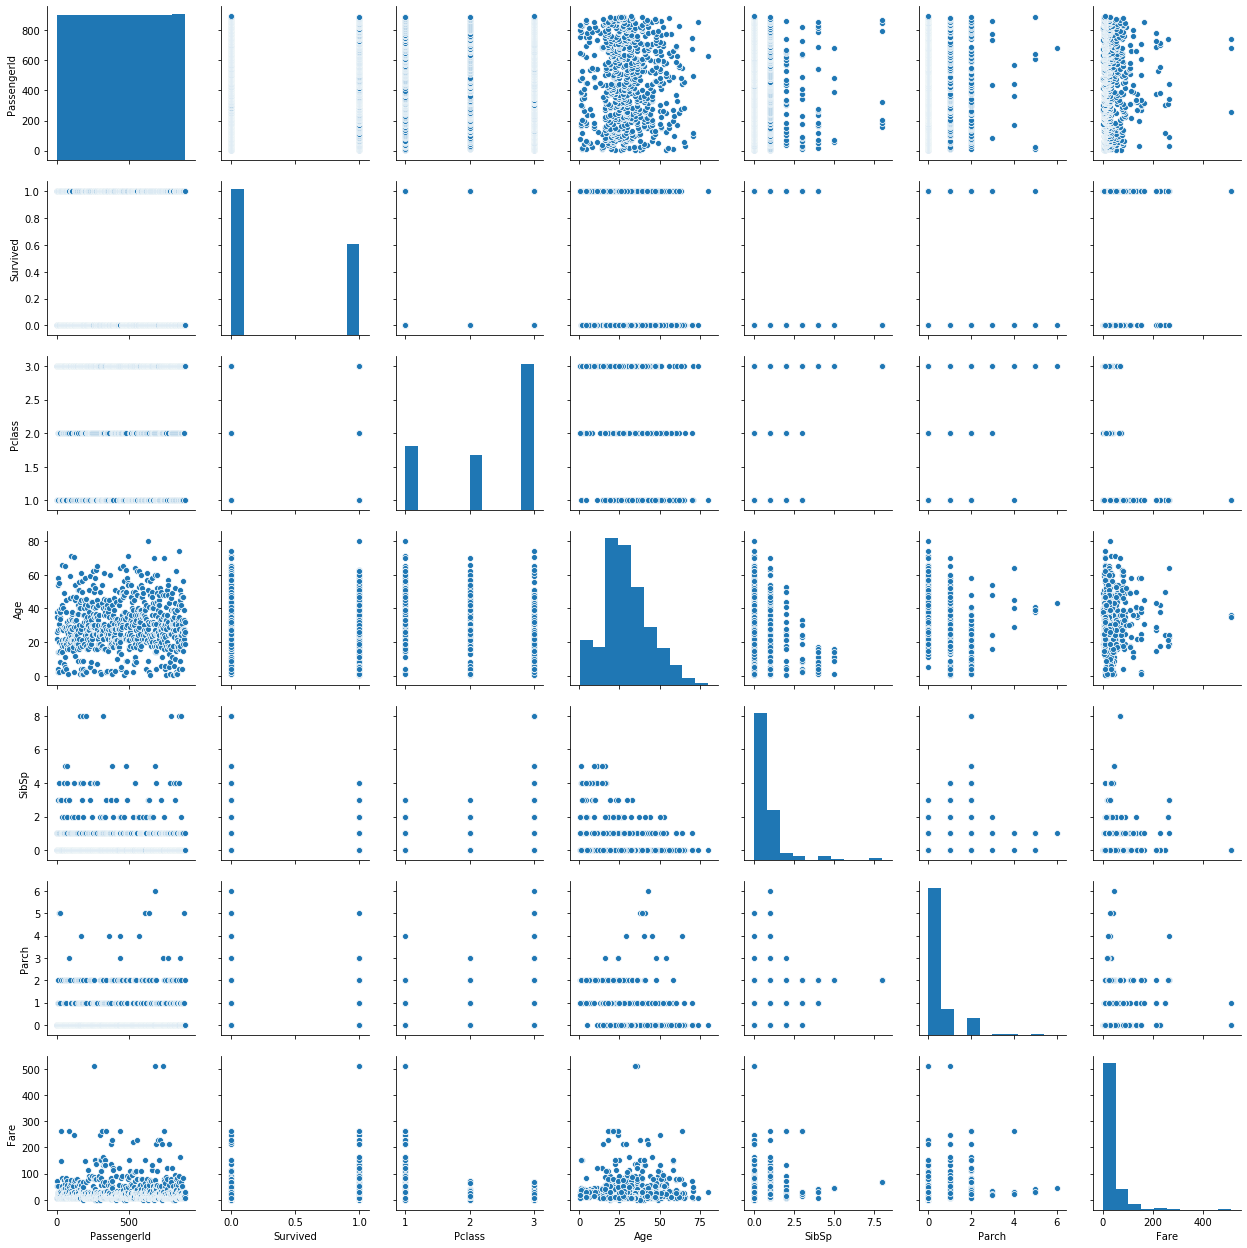

In [10]:
sns.pairplot(df, hue=None)

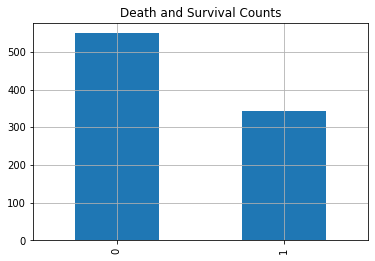

In [9]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True,)
plt.show()

- from this bar we know that the amount of people did not survive are higher comparitively.

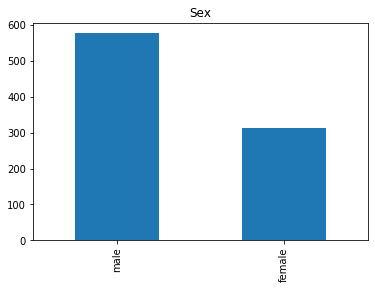

In [7]:
df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

- from this bar plot we understand that majority of the passengers were men.

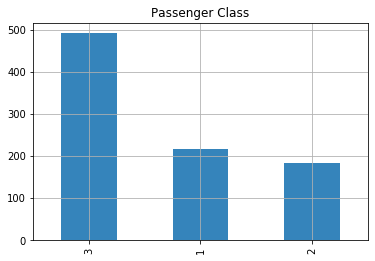

In [8]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

- It can be infered that the largest number of passengers were in class 3 followed by class 1 and class 2.

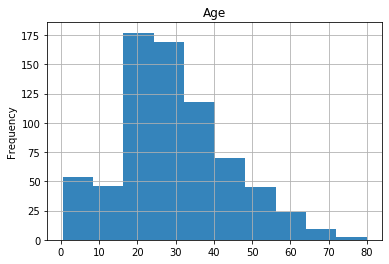

In [9]:
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

- This indicates that the majority of passengers were in the age group 15-30 years.

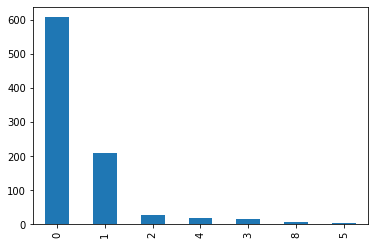

In [33]:
df['SibSp'].value_counts().plot.bar()

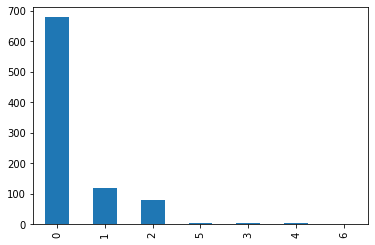

In [34]:
df['Parch'].value_counts().plot.bar()

# Bi-Variate Analysis

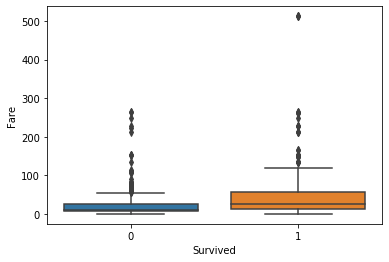

In [14]:
sns.boxplot(y="Fare", x="Survived", data=df)

- This indicates that the var "Fare" is right skewed and we have outliers present in the data. 

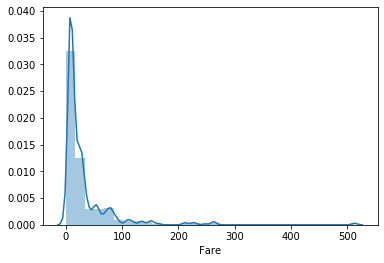

In [24]:
sns.distplot(df["Fare"], bins=30)

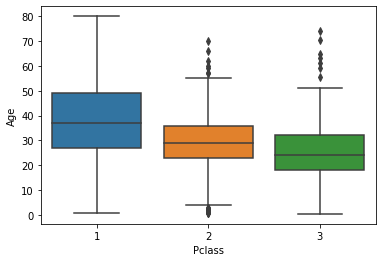

In [32]:
sns.boxplot(y = 'Age', x = 'Pclass', data =df)

- We see that the distrubution of age in respective class is normal, however there are outliers present in Class 2 & 3.

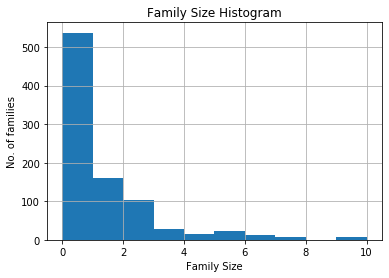

In [35]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()

- We define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses)

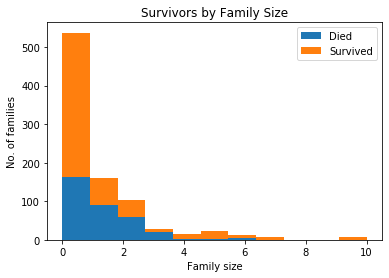

In [36]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived=df[df['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

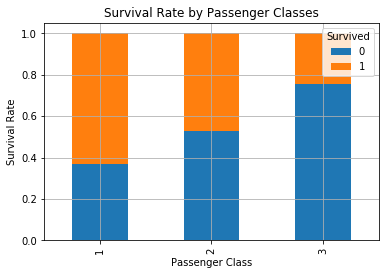

In [37]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

- Those in First Class has the highest survival rate.

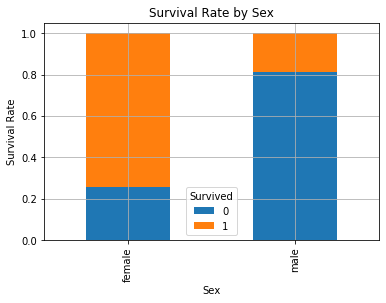

In [38]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True) 
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

- the above bar plot shows that the female survivors are high compared to male survivors. 

In [41]:
# Get the unique values of Pclass:

passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [42]:
# Count males and females in each Pclass:


for i in passenger_classes:
        print ('M : ',i ,len(df[(df['Sex'] == 'male')  & (df['Pclass'] == i)]))
        print ('F : ',i ,len(df[(df['Sex'] =='female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


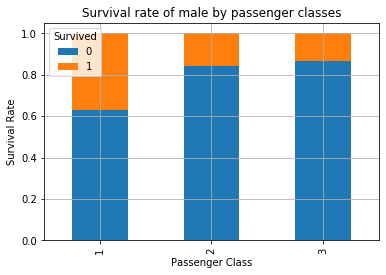

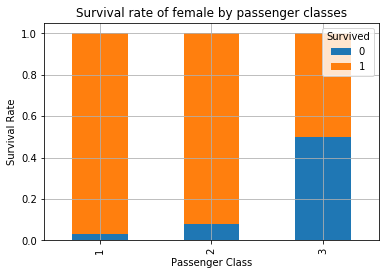

In [43]:
# Plot survival rate by Sex and Pclass:

male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

- The above plot talks about the survival rate with respect to gender and their respective class

In [44]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


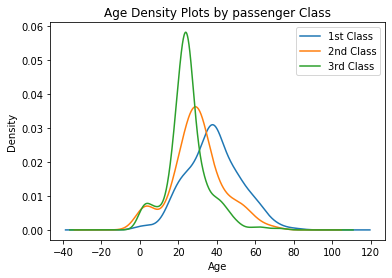

In [64]:
for i in passenger_classes :
        df.Age_complete[df.Pclass==i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

- For more detailed analysis, draw the age density plots.

# Feature Engineering

### 1. Creating a numeric variable for "Sex".

In [46]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


### 2. Embarked Value

In [49]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())

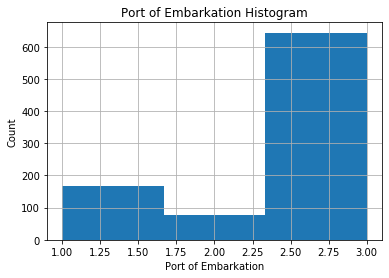

In [50]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [51]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Sex_Val,Embarked_Value
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0,NaN


- In the above table we can see that the Embarked Column is missing certain values, which have to be filled otherwise it may cause problems during the machine learning algorithms.

In [54]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0, nan]

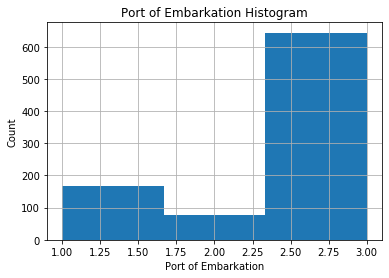

In [55]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

- Evidently the majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':

In [56]:
## Imputing Missing Values with Mode

df['Embarked_Value']=df['Embarked_Value'].fillna(3)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0]

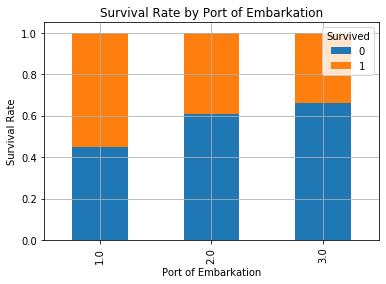

In [57]:
embarked_rel=pd.crosstab(df['Embarked_Value'],df['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          889 non-null object
Family_Size       891 non-null int64
Sex_Val           891 non-null int32
Embarked_Value    891 non-null float64
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 101.1+ KB


### Imputing missing values for Age

- Here many values under the var age are missing. So we assign the missing ages the median values of the age according to their sex and passenger class.

In [60]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))
df['Age_complete'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_complete, dtype: float64

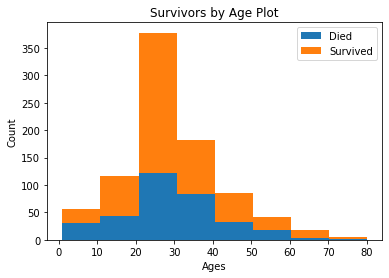

In [61]:
age_survived=df[df['Survived']==1]['Age_complete']
age_not_survived = df[df['Survived'] == 0]['Age_complete']
max_age=max(df['Age_complete'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

- Visualization of Age with respect to Survival rate

# Model Building

In [70]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df1=df.drop(['Name','Sex','Ticket','Cabin','Embarked','PassengerId','Age','Embarked_Value'],axis=1)
df1.head()

,Survived,Pclass,SibSp,Parch,Fare,Family_Size,Sex_Val,Age_complete
0,0,3,1,0,7.2500,1,1,22.0
1,1,1,1,0,71.2833,1,0,38.0
2,1,3,0,0,7.9250,0,0,26.0
3,1,1,1,0,53.1000,1,0,35.0
4,0,3,0,0,8.0500,0,1,35.0


- We store the data as numpy array to perform machine learning algorithms.

In [72]:
train_data=df1.values

- train_features includes all the columns except the Survived. train_target includes the Survived column.

In [84]:
train_features = train_data[:, 1:]
train_target = train_data[:, 0]

print(pd.DataFrame(train_features).head())
print(pd.DataFrame(train_target).head())

     0    1    2        3    4    5     6
0  3.0  1.0  0.0   7.2500  1.0  1.0  22.0
1  1.0  1.0  0.0  71.2833  1.0  0.0  38.0
2  3.0  0.0  0.0   7.9250  0.0  0.0  26.0
3  1.0  1.0  0.0  53.1000  1.0  0.0  35.0
4  3.0  0.0  0.0   8.0500  0.0  1.0  35.0
     0
0  0.0
1  1.0
2  1.0
3  1.0
4  0.0


- We fit the classifier

- Reading and converting the test data to numpy array

In [199]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 7) (891,)
(712, 7) (712,)
(179, 7) (179,)


# Naive_Bayes Classifier

In [202]:
clf = GaussianNB()
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Naive Bayes Accuracy = 0.80
[[92 18]
 [18 51]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       110
         1.0       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Logistic Regression


In [203]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
predict_y = logreg.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Regression Accuracy = 0.79
[[94 16]
 [21 48]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       110
         1.0       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [178]:
rfe = RFE(logreg, 5)
rfe = rfe.fit(train_features, train_target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True False]
[1 1 1 3 1 1 2]


C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision Tree

In [161]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predict_y = decision_tree.predict(test_x)
print ("Decision Tree Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Decision Tree Accuracy = 0.84
[[100  10]
 [ 19  50]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       110
         1.0       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



# Random Forest

In [162]:
RandomForest = RandomForestClassifier(n_estimators=800)
RandomForest.fit(train_x,train_y)
predict_y = RandomForest.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

RandomForest Accuracy = 0.83
[[99 11]
 [19 50]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       110
         1.0       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# Random Forest with fine tuned parameters

In [163]:
RandomForest2 = RandomForestClassifier(n_estimators=800, 
                                      max_depth=3, 
                                      criterion="gini", 
                                      bootstrap=True,)
                                    
RandomForest2.fit(train_x,train_y)
predict_y = RandomForest2.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

RandomForest Accuracy = 0.82
[[98 12]
 [21 48]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       110
         1.0       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



#### Feature Importance

In [136]:
print(RandomForest.feature_importances_)
print(RandomForest2.feature_importances_)

[0.14777551 0.03807035 0.02308559 0.16377188 0.07422051 0.46700388
 0.08607228]
[0.15267246 0.03182668 0.02206293 0.15770609 0.07293218 0.47495094
 0.08784872]


- Basis the above feature importnace, dropping the vars "SibSp", "Parch" to build another model.

In [130]:
df1.head()

,Survived,Pclass,SibSp,Parch,Fare,Family_Size,Sex_Val,Age_complete
0,0,3,1,0,7.2500,1,1,22.0
1,1,1,1,0,71.2833,1,0,38.0
2,1,3,0,0,7.9250,0,0,26.0
3,1,1,1,0,53.1000,1,0,35.0
4,0,3,0,0,8.0500,0,1,35.0


In [138]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df2=df.drop(['Name','Sex','Ticket','Cabin','SibSp','Embarked','Parch','PassengerId','Age','Embarked_Value'],axis=1)
df2.head()

,Survived,Pclass,Fare,Family_Size,Sex_Val,Age_complete
0,0,3,7.2500,1,1,22.0
1,1,1,71.2833,1,0,38.0
2,1,3,7.9250,0,0,26.0
3,1,1,53.1000,1,0,35.0
4,0,3,8.0500,0,1,35.0


In [150]:
traindata1=df1.values

In [151]:
trainfeature1 = train_data[:, 1:]
traintarget1 = train_data[:, 0]

print(pd.DataFrame(trainfeature1).head())
print(pd.DataFrame(traintarget1).head())

     0    1    2        3    4    5     6
0  3.0  1.0  0.0   7.2500  1.0  1.0  22.0
1  1.0  1.0  0.0  71.2833  1.0  0.0  38.0
2  3.0  0.0  0.0   7.9250  0.0  0.0  26.0
3  1.0  1.0  0.0  53.1000  1.0  0.0  35.0
4  3.0  0.0  0.0   8.0500  0.0  1.0  35.0
     0
0  0.0
1  1.0
2  1.0
3  1.0
4  0.0


In [153]:
train_x, test_x, train_y, test_y = train_test_split(trainfeature1, traintarget1, test_size=0.20, random_state=0)
print (trainfeature1.shape, traintarget1.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 7) (891,)
(712, 7) (712,)
(179, 7) (179,)


# Random Forest with reduced features
#### (Based on feature importance)

In [218]:
RandomForest3 = RandomForestClassifier(n_estimators=1000, 
                                      max_depth=2, 
                                      criterion="gini", 
                                      bootstrap=True,)
                                    
RandomForest3.fit(train_x,train_y)
predict_y = RandomForest3.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

RandomForest Accuracy = 0.84
[[108   2]
 [ 27  42]]
              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88       110
         1.0       0.95      0.61      0.74        69

    accuracy                           0.84       179
   macro avg       0.88      0.80      0.81       179
weighted avg       0.86      0.84      0.83       179



- Based on the results there is a slight improvement in the model and the precision score has improved.

# Naive Bayes

In [165]:
clf2 = GaussianNB()
clf2 = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Naive Bayes Accuracy = 0.80
[[92 18]
 [18 51]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       110
         1.0       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Logistic Regression

In [166]:
logreg2 = LogisticRegression()
logreg.fit(train_x, train_y)
predict_y = logreg.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Regression Accuracy = 0.79
[[94 16]
 [21 48]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       110
         1.0       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


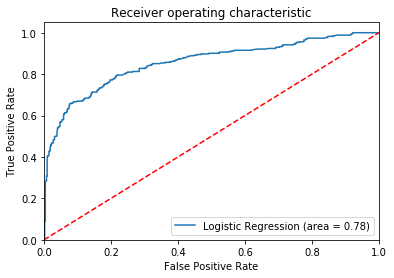

In [183]:
logit_roc_auc = roc_auc_score(traintarget1, logreg.predict(trainfeature1))
fpr, tpr, thresholds = roc_curve(traintarget1, logreg.predict_proba(trainfeature1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [167]:
decision_tree2 = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predict_y = decision_tree.predict(test_x)
print ("Decision Tree Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Decision Tree Accuracy = 0.83
[[98 12]
 [19 50]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       110
         1.0       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



# Scaling features and Building new model

In [204]:
scaler = StandardScaler()
scaler.fit(trainfeature1)
scaled_features = scaler.transform(trainfeature1)
scl_cred = pd.DataFrame(scaled_features)
scl_cred.head()

,0,1,2,3,4,5,6
0,0.827377,0.432793,-0.473674,-0.502445,0.059160,0.737695,-0.534891
1,-1.566107,0.432793,-0.473674,0.786845,0.059160,-1.355574,0.668392
2,0.827377,-0.474545,-0.473674,-0.488854,-0.560975,-1.355574,-0.234070
3,-1.566107,0.432793,-0.473674,0.420730,0.059160,-1.355574,0.442776
4,0.827377,-0.474545,-0.473674,-0.486337,-0.560975,0.737695,0.442776


In [206]:
train_x, test_x, train_y, test_y = train_test_split(scaled_features, traintarget1, test_size=0.20, random_state=0)
print (trainfeature1.shape, traintarget1.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 7) (891,)
(712, 7) (712,)
(179, 7) (179,)


# Naive Bayes

In [207]:
clf2 = GaussianNB()
clf2 = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Naive Bayes Accuracy = 0.80
[[92 18]
 [18 51]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       110
         1.0       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Logistic Regression

In [208]:
logreg2 = LogisticRegression()
logreg.fit(train_x, train_y)
predict_y = logreg.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Regression Accuracy = 0.81
[[95 15]
 [19 50]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       110
         1.0       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



C:\Users\zaina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- It is evident that after scaling the features, the accuracy has increased by 2%.

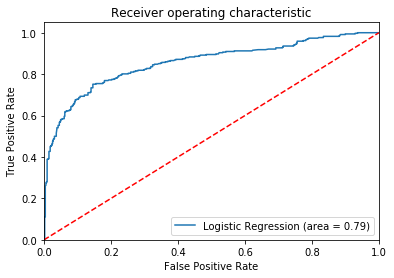

In [210]:
logit_roc_auc = roc_auc_score(traintarget1, logreg.predict(scaled_features))
fpr, tpr, thresholds = roc_curve(traintarget1, logreg.predict_proba(scaled_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [211]:
decision_tree3 = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predict_y = decision_tree.predict(test_x)
print ("Decision Tree Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

Decision Tree Accuracy = 0.83
[[100  10]
 [ 21  48]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       110
         1.0       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



# Random Forest

In [215]:
RandomForest3 = RandomForestClassifier(n_estimators=1000, 
                                      max_depth=2, 
                                      criterion="gini", 
                                      bootstrap=True,)
                                    
RandomForest3.fit(train_x,train_y)
predict_y = RandomForest3.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

RandomForest Accuracy = 0.84
[[106   4]
 [ 25  44]]
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       110
         1.0       0.92      0.64      0.75        69

    accuracy                           0.84       179
   macro avg       0.86      0.80      0.82       179
weighted avg       0.85      0.84      0.83       179



# Final Model on Entire Data

### Random Forest - Final Model

In [221]:
RandomForest3 = RandomForestClassifier(n_estimators=1000, 
                                      max_depth=2, 
                                      criterion="gini", 
                                      bootstrap=True,)

RandomForest3.fit(scaled_features,traintarget1)
predict_y = RandomForest3.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))
print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

RandomForest Accuracy = 0.84
[[108   2]
 [ 26  43]]
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       110
         1.0       0.96      0.62      0.75        69

    accuracy                           0.84       179
   macro avg       0.88      0.80      0.82       179
weighted avg       0.86      0.84      0.83       179



#### Summary

- The final accuracy of the model is 84%
    - The TP predicted is 108
    - The FP predicted is 2.
    - The FN predicted is 26.
    - The TN predicted is 43.